In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


https://drive.google.com/uc?export=download&id=/12MRxUstsZeTmR7lEGnsutbu0m5m5oSi0

In [ ]:
titanic_data = pd.read_csv('https://drive.google.com/uc?export=download&id=12MRxUstsZeTmR7lEGnsutbu0m5m5oSi0')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titanic_data.shape

(891, 12)

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
titanic_data = titanic_data.drop(columns=['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1, errors='ignore')

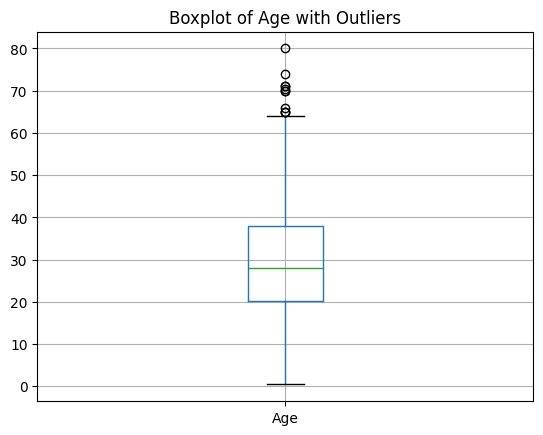

In [ ]:
titanic_data.boxplot(column=['Age'])
plt.title("Boxplot of Age with Outliers")
plt.show()

In [ ]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

/tmp/ipython-input-423417795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
/tmp/ipython-input-423417795.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
titanic_data = titanic_data.dropna(subset=['Embarked'])

In [ ]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,340


In [ ]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,312


In [ ]:
titanic_data['Pclass'].value_counts()

,count
Pclass,
3,491
1,214
2,184


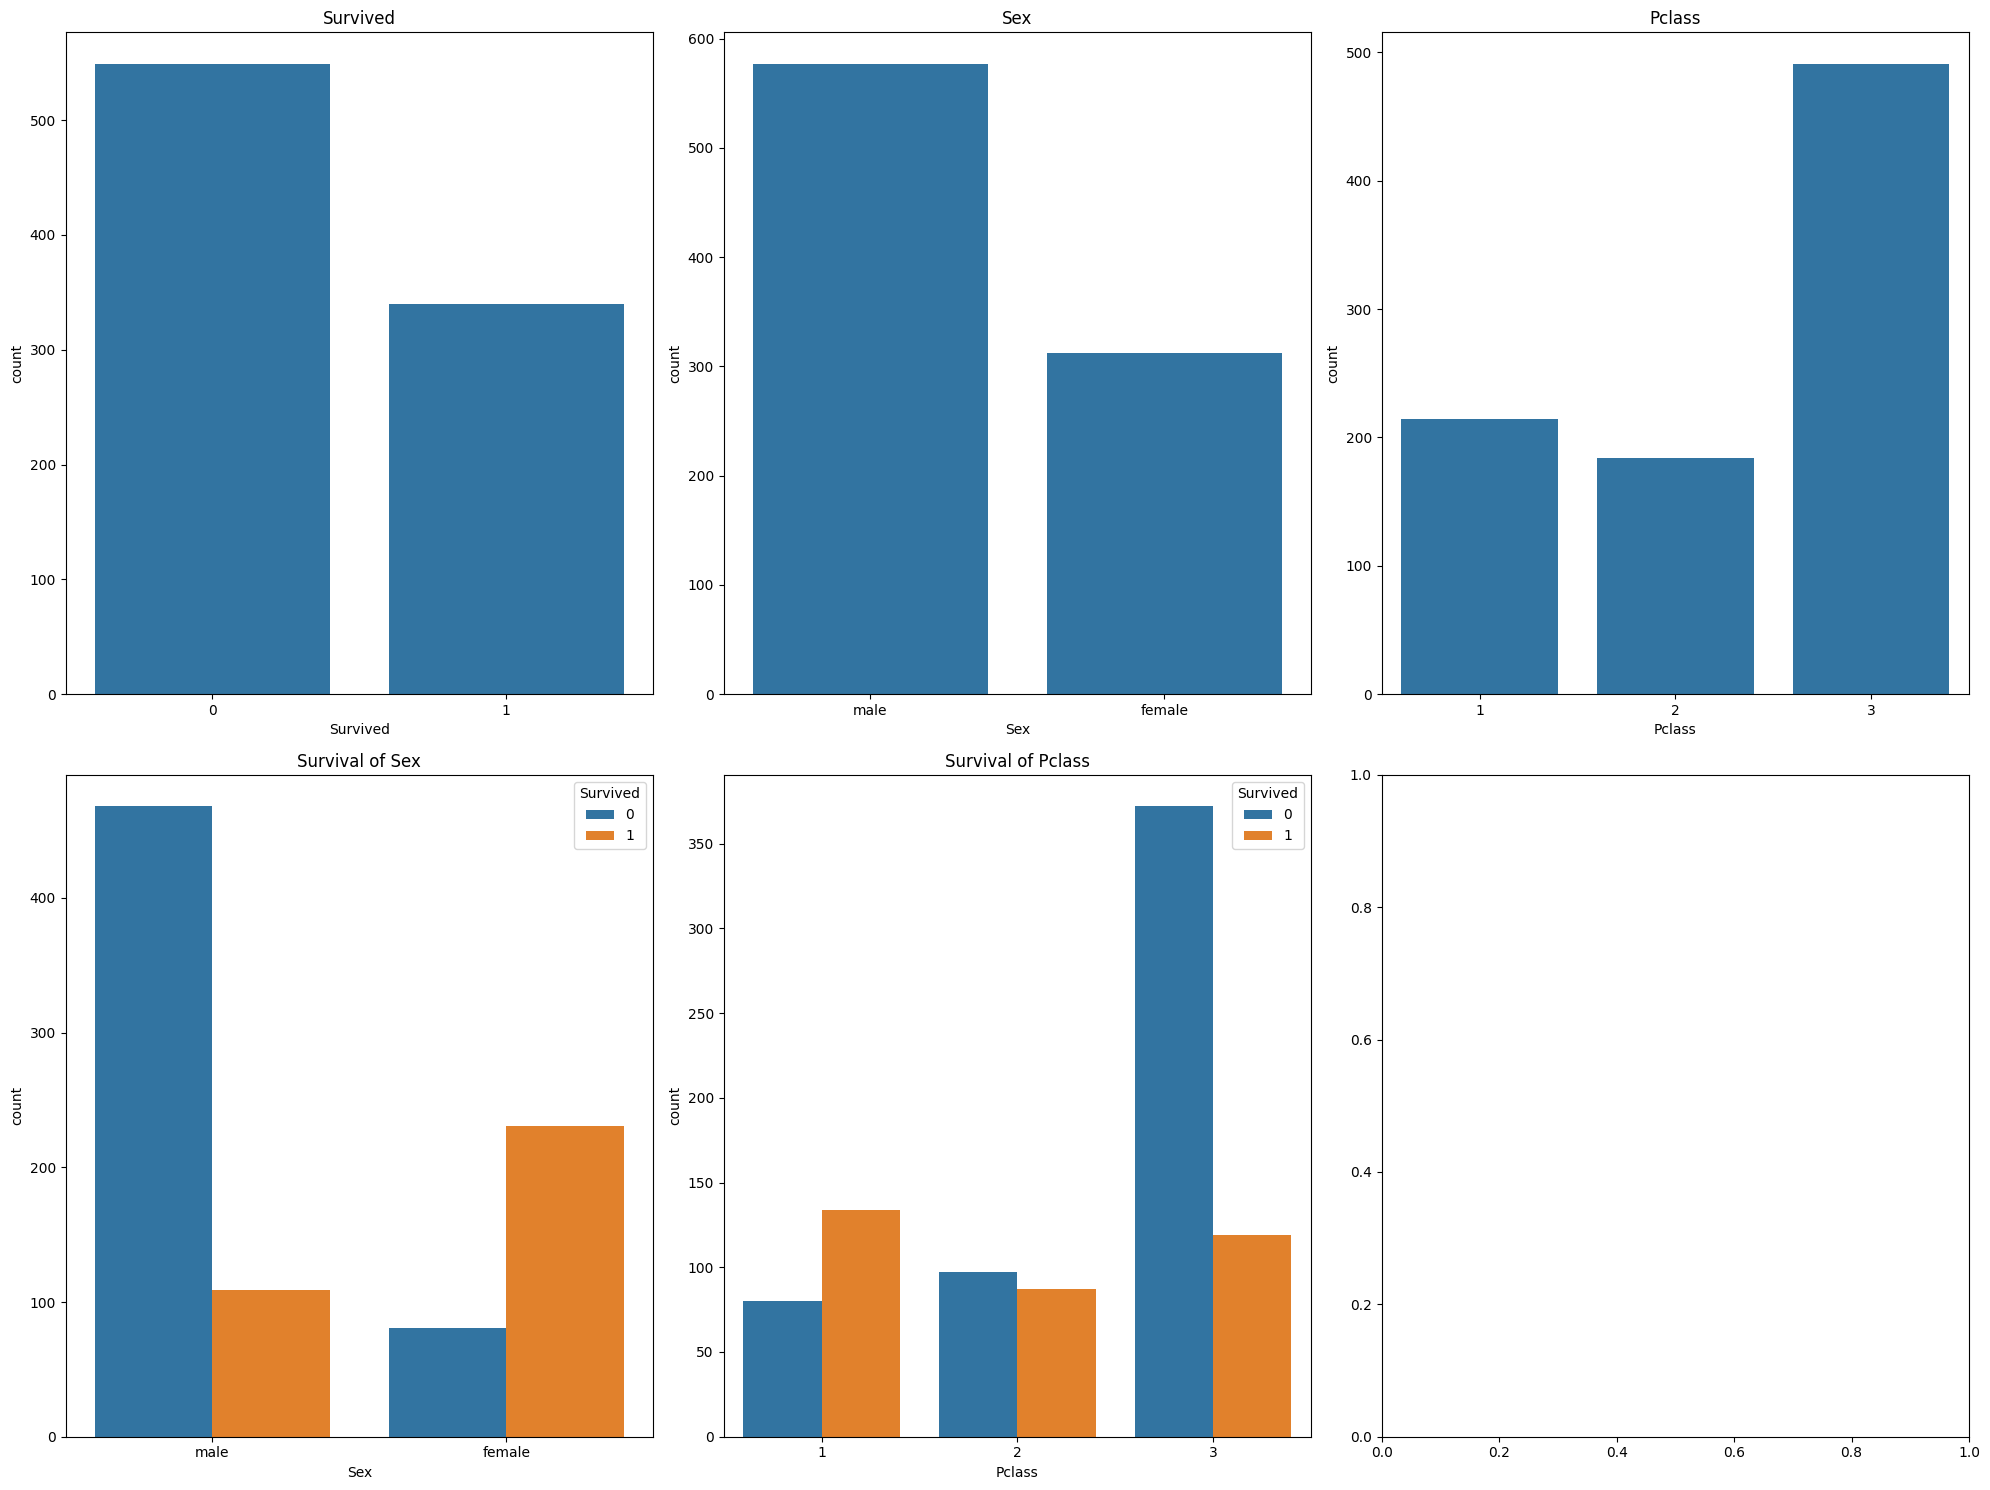

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
axes = axes.flatten()

sns.countplot(x= 'Survived', data=titanic_data, ax=axes[0])
axes[0].set_title('Survived')

sns.countplot(x= 'Sex', data=titanic_data, ax=axes[1])
axes[1].set_title('Sex')

sns.countplot(x= 'Pclass', data=titanic_data, ax=axes[2])
axes[2].set_title('Pclass')

sns.countplot(x= 'Sex', hue='Survived', data = titanic_data, ax=axes[3])
axes[3].set_title('Survival of Sex')

sns.countplot(x= 'Pclass', hue='Survived', data=titanic_data, ax=axes[4])
axes[4].set_title('Survival of Pclass')

plt.tight_layout()
plt.show()

In [ ]:
replacements = {
    'Sex': {'male': 0, 'female': 1},
    'Embarked': {'S': 0, 'C': 1, 'Q': 2}
}

titanic_data = titanic_data.replace(replacements)

/tmp/ipython-input-331411401.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data = titanic_data.replace(replacements)


In [ ]:
titanic_data.iloc[0:9]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S


In [ ]:
X =titanic_data.drop(columns=['Survived'])
Y = titanic_data['Survived']

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [ ]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y,random_state=42)

In [ ]:
print(X.shape, X_train.shape,X_test.shape)

(889, 7) (711, 7) (178, 7)


In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, Y_train)

GaussianNB()

In [ ]:
# Accuracy
train_pred_nb = nb_model.predict(X_train_scaled)
test_pred_nb = nb_model.predict(X_test_scaled)

In [ ]:
print('Accuracy on training data:', accuracy_score(Y_train, train_pred_nb))
print('Accuracy on test data:', accuracy_score(Y_test, test_pred_nb))

Accuracy on training data: 0.7848101265822784
Accuracy on test data: 0.8033707865168539


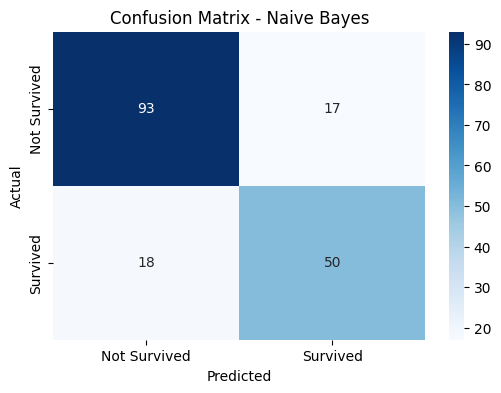

In [ ]:
# Visualisasi Confusion Matrix (Naive Bayes)
plt.figure(figsize=(6,4))
cm_nb = confusion_matrix(Y_test, test_pred_nb)

sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
xticklabels=['Not Survived', 'Survived' ],
yticklabels=['Not Survived', 'Survived' ])

plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print("\nClassification Report (NB):")
print(classification_report(Y_test, test_pred_nb))


Classification Report (NB):
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        68

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [ ]:
from sklearn.model_selection import cross_val_score
cv_nb = cross_val_score(nb_model, X, Y, cv=5, scoring='accuracy' )
print("\nNaive Bayes Cross Validation Accuracy (5-Fold):")
print("Scores:", cv_nb)
print("Mean Accuracy:", cv_nb.mean())
print("Std Deviation:", cv_nb.std())


Naive Bayes Cross Validation Accuracy (5-Fold):
Scores: [0.76404494 0.79213483 0.80337079 0.78651685 0.79096045]
Mean Accuracy: 0.7874055735415476
Std Deviation: 0.012933676275725458
